In [25]:
%pip install numpy pandas matplotlib scikit-learn scipy statsmodels tabulate


Note: you may need to restart the kernel to use updated packages.


***Partie PYTHON***


**2 Régression Linéaire : Chargement et Exploration des Données**

*2.1 Exploration du dataset Wage*

In [26]:
import pandas as pd

# 1. Charger les données depuis un fichier csv
file_path = "Wage.csv"
data = pd.read_csv(file_path)

# 2. Afficher les prelières lignes du dataset
print(data.head())

# 3. Afficher la liste de nom des colonnes
print(data.columns)


   year  age            maritl      race        education              region  \
0  2006   18  1. Never Married  1. White     1. < HS Grad  2. Middle Atlantic   
1  2004   24  1. Never Married  1. White  4. College Grad  2. Middle Atlantic   
2  2003   45        2. Married  1. White  3. Some College  2. Middle Atlantic   
3  2003   43        2. Married  3. Asian  4. College Grad  2. Middle Atlantic   
4  2005   50       4. Divorced  1. White       2. HS Grad  2. Middle Atlantic   

         jobclass          health health_ins   logwage        wage  
0   1. Industrial       1. <=Good      2. No  4.318063   75.043154  
1  2. Information  2. >=Very Good      2. No  4.255273   70.476020  
2   1. Industrial       1. <=Good     1. Yes  4.875061  130.982177  
3  2. Information  2. >=Very Good     1. Yes  5.041393  154.685293  
4  2. Information       1. <=Good     1. Yes  4.318063   75.043154  
Index(['year', 'age', 'maritl', 'race', 'education', 'region', 'jobclass',
       'health', 'health

2.2 Description des Colonnes

Liste des colonnes : 
- 'year': année de l'observation
- 'age': âge de l'individu en année
- 'maritl': statut marital
- 'race': catégorie ethnique de l'individu
- 'education': niveau d'éducation
- 'region': zone géographique d'habitation de l'individu
- 'jobclass': classe d'emploi
- 'health': état de santé
- 'health_ins': assurance santé
- 'logwage': salaire horaire en logarithme
- 'wage': salaire horaire

** 3 Régression Linéaire Simple**

*3.1 Expression du podèle de régression linéaire simple et explication de ses composantes*

$$
Y = \beta_0 + \beta_1X + ε
$$

Y : (wage) salaire horaire

X : (age) l'âge de l'invidu

β0 : ordonnée à l'origine décrivant le salaire moyen prédit par l'age

β1 : coefficient de régression symbolisant la variation moyenne du salaire en fonction de l'âge

ε : erreur 

*3.2 Equations mathématiques des coefficient*

Estimer β1 et β0 : en utilisant la méthode des moindres carrés

$$ 
\hat{\beta}_1 = \frac{S_{yx}}{S_{xx}} =\frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2}
$$

$$
\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}
$$


*3.3 Implémentation manuelle des coefficients*

calcul des coefficient sans librairie de régression : 

$$
\hat{\beta_1} = 0.7
$$
$$
\hat{\beta_0} = 81.7
$$


In [27]:
import numpy as np 

# 1. Extraire les variables indépendante et dépendante
X = data["age"].values
Y = data["wage"].values

# 2. Calcul des moyenes de X et Y avec numpy
X_mean = np.mean(X)
Y_mean = np.mean(Y)

# 3. Calcul du coefficient beta_1 (pente)
Sxy = np.sum((X - X_mean) * (Y - Y_mean))
Sxx = np.sum((X - X_mean) ** 2)
beta_1 = Sxy / Sxx

# 4. Calcul du coefficient beta_0 (intercept)
beta_0 = Y_mean - beta_1 * X_mean

# 5. Affichage des coefficients
print(f"beta_0: {beta_0}")
print(f"beta_1: {beta_1}")

beta_0: 81.70473544394636
beta_1: 0.7072759287148412


*3.4 Comparaison avec les bibliothèques statsmodels et scikit-learn*

In [28]:
import statsmodels.api as sm

# 1. Ajout de la constante pour l'intercept dans le modèle
X_with_const = sm.add_constant(X)

# 2. Ajustement du modèle de régression
model = sm.OLS(Y, X_with_const).fit()

# 3. Affichage du résumé des résultats avec statmodels
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     119.3
Date:                Thu, 25 Sep 2025   Prob (F-statistic):           2.90e-27
Time:                        15:12:03   Log-Likelihood:                -15391.
No. Observations:                3000   AIC:                         3.079e+04
Df Residuals:                    2998   BIC:                         3.080e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         81.7047      2.846     28.706      0.0

In [29]:
from sklearn.linear_model import LinearRegression

# 1. Création du modèle de régression linéaire
model_sklearn = LinearRegression()

# 2. Reshape de X en une matrice colonne
X_reshaped = X.reshape(-1, 1)

# 3. Entrainement du modèle avec les données
model_sklearn.fit(X_reshaped, Y)

# 4. Affichage des coefficients
print(f"Coefficient beta_1 avec scikit-learn: {model_sklearn.coef_[0]:.4f}")
print(f"Intercept beta_0 avec scikit-learn: {model_sklearn.intercept_:.4f}")


Coefficient beta_1 avec scikit-learn: 0.7073
Intercept beta_0 avec scikit-learn: 81.7047


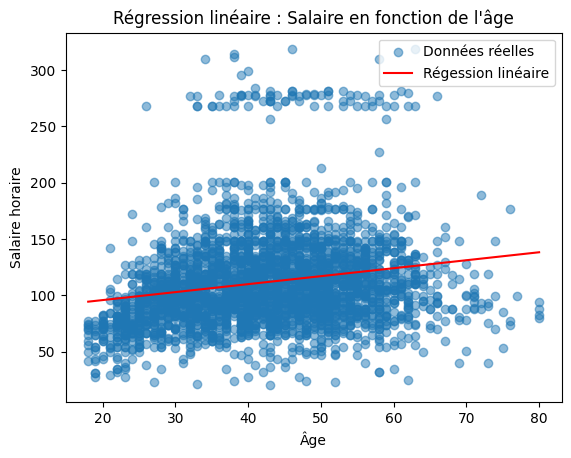

In [30]:
import matplotlib.pyplot as plt

# 1. Tracer le nuage de points des données
plt.scatter(X, Y, alpha=0.5, label='Données réelles')

# 2. Générer ladroite de régression 
age_range = np.linspace(X.min(), X.max(), 100)
predicted_wage = beta_0 + beta_1 * age_range

# 3. tracer la droite de régression
plt.plot(age_range, predicted_wage, color='red', label='Régession linéaire')

# 4. Ajout des labels et et un titre
plt.xlabel("Âge")
plt.ylabel("Salaire horaire")
plt.title("Régression linéaire : Salaire en fonction de l'âge")
plt.legend()
plt.show()

*3.6 Calcul du coefficient de déterminaiton R² et interprétation*


$$
R^2 =\frac{SC_{reg}}{SC_{totale}}
$$

avec : 
$$ 
SC_{reg} = \sum_{i=1}^n{(\hat{y_i}-\bar{y_i})^2} \space \space \text{(somme des carrés des résidus)}
$$

$$
SC_{totale} = \sum_{i=1}^n{(y_i-\bar{y_i})^2} \space \space \text{(somme des carrés totale)}
$$

In [31]:
import numpy as np 

# 1. Calcul de la somme des carrés totale (SC_totale)
Y_mean = np.mean(Y)
SC_totale = np.sum((Y - Y_mean) ** 2)

# 2. Calcul de la somme des carrés expliquée par la régression (SC_reg)
Y_pred = beta_0 + beta_1 * X
SC_reg = np.sum((Y_pred - Y_mean) ** 2)

# 3. Calcul du coefficient de détermination R^2
R2 = SC_reg / SC_totale

# Affichage du résultat
print(f"Coefficient de détermination R^2: {R2:.4f}")



Coefficient de détermination R^2: 0.0383


*3.7 Analyse des Résidus et Interprétation des Résultats*

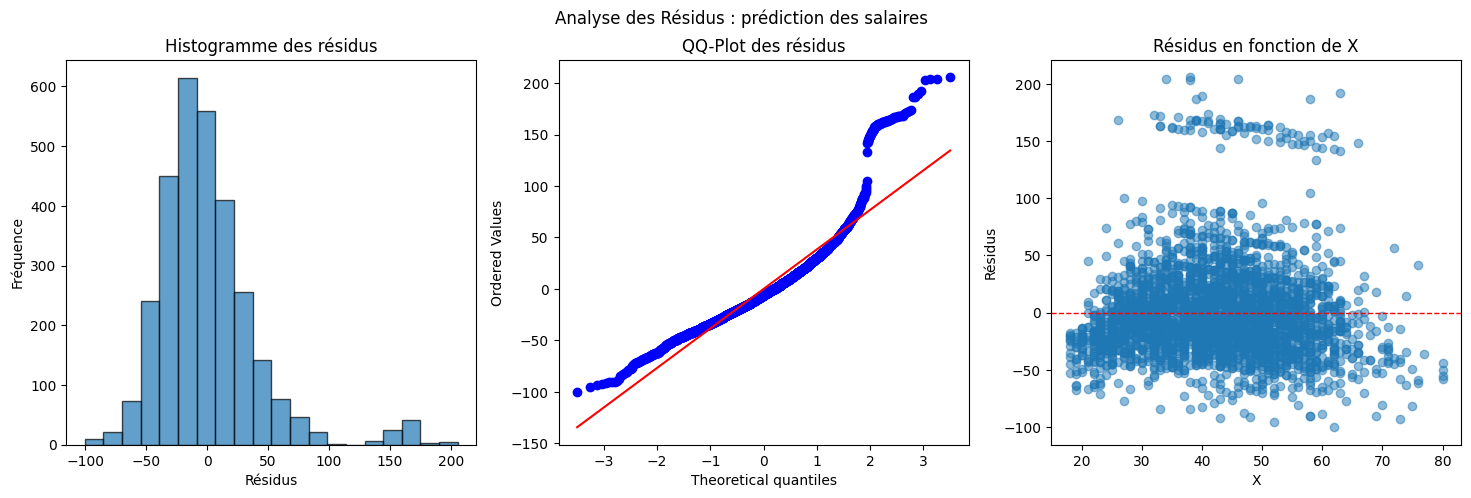

In [32]:
# Fonction pour tracer les graphiques des résidus
import scipy.stats as stats

def plot_residuals(X, Y, Y_pred, title):
    residuals = Y - Y_pred

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # Histogramme des résidus
    axes[0].hist(residuals, bins=20, edgecolor='black', alpha=0.7)
    axes[0].set_title('Histogramme des résidus')
    axes[0].set_xlabel('Résidus')
    axes[0].set_ylabel('Fréquence')

    # QQ-Plot des résidus
    stats.probplot(residuals, dist="norm", plot=axes[1])
    axes[1].set_title('QQ-Plot des résidus')

    # Graphique des résidus
    axes[2].scatter(X, residuals, alpha=0.5)
    axes[2].axhline(0, color='red', linestyle='dashed', linewidth=1)
    axes[2].set_title('Résidus en fonction de X')
    axes[2].set_xlabel('X')
    axes[2].set_ylabel('Résidus')

    plt.suptitle(title)
    plt.show()

plot_residuals(X, Y, Y_pred, "Analyse des Résidus : prédiction des salaires")

2. 

(a)  

Histogramme des résidus: La distribution est globalement centrée proche de zéro vers la gauche, mais pas parfaitement symétrique et semble un peu plus étalée vers la droite. Ainsi les erreurs de prédiction ne suivent pas une stricte loi normale, ce qui peut indiquer une non-pertience du modème pour certaines observations.

QQ-plot des résidus: De nombreux points s’écartent de la droite, confirmant que la normalité des résidus n’est pas respectée. On observe particulièrement des valeurs extrêmes prouvant que le modèle n'est pas adapté à la distribution des résidus.

Résidus en fonction de l’âge: Certains motifs, tels que des regroupements horizontaux apparaissent, traduisant que le modèle linéaire ne capture pas toute la complexité de la relation entre salaire et âge.

(b) 

R² = 0.0383 ainsi seulement 3,83% de la variance du salaire est expliquée par l'âge ce qui témoigne d'une faible explicabilité du modèle. En couplant R² aux graphiques ci-dessus, cela confirme que le modèle linéaire simplie a une faible capacité explicative et ne représente pas correctement la relation entre âge et salaire.

(c) 
- Ajouter des vairables explicative, cela permettrait de mieux expliquer la variabilité du salaire. Une régression multiple tiendrait compte de plusieurs effets et augmenterais R².

- Tester des relations non linéaire, cela permettrait de modéliser des variations plus complexe.

- vérifier les interactions entre variable, cela permettrait d'améliorer la capacité explicative du modèle.

***4 Régression Linéaire Multiple***

**4.1 Expression du modèle de régression linéaire multiple**

1. 
$$ Y = \beta_0 + \beta_1X_1 + \beta_2X_2+ ... + \beta_pX_p + ε $$

2. 
$$\mathbf{Y} = \mathbf{X} \boldsymbol{\beta} + \boldsymbol{\varepsilon}
$$
$$ 
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{bmatrix}  = \begin{bmatrix}
1 & x_{11} & x_{12} & \dots & x_{1p} \\
1 & x_{21} & x_{22} & \dots & x_{2p} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{n1} & x_{n2} & \dots & x_{np}
\end{bmatrix}
\begin{bmatrix}
\beta_0 \\
\beta_1 \\
\vdots \\
\beta_p
\end{bmatrix} +
\begin{bmatrix}
\varepsilon_1 \\
\varepsilon_2 \\
\vdots \\
\varepsilon_n
\end{bmatrix}
$$

3. 
$$ \boldsymbol{\hat{\beta}} = (X^TX)^{-1}X^TY $$



**4.2 Ajout de variable explicatives**

In [33]:
# Charger les données
file_path = "Wage.csv"
data = pd.read_csv(file_path)

# Sélectionner toutes les variables explicatives sauf 'logwage' et 'wage'
X = data.drop(columns=['logwage', 'wage'])

 # Convertir les variables catégorielles en variables numérique (one-hot encoding)
X = pd.get_dummies(X, drop_first=True)

# Convertir toutes les valeurs en float
X = X.astype(float)

# Extraire la variable cible
Y = data['wage'].values

# Ajouter une colonne de 1 pour le terme d'intercept
X_with_1 = sm.add_constant(X)

# Calcul des coefficients de régressions selon al formule des MCO
beta = np.linalg.inv(X_with_1.T @ X_with_1) @ X_with_1.T @ Y

# Affichage des coefficients
print("Coefficients estimés du modèle")
print(beta)


Coefficients estimés du modèle
0    -2423.329067
1        1.241217
2        0.270688
3       17.176735
4        2.051726
5        3.966589
6       11.530144
7       -5.096264
8       -2.814092
9       -6.058831
10       7.759204
11      18.340498
12      31.239802
13      53.948514
14       3.570669
15       6.515124
16     -17.512534
dtype: float64


**4.3 Comparaison avec les modèles de statsmodels et scikit-learn**

In [34]:
import statsmodels.api as sm

# Ajouter uen constante pour inclure l'intercept dans le modèle
X_with_const = sm.add_constant(X)

# Ajustement du modèle de régression linéaire multiple
model = sm.OLS(Y, X_with_const).fit()

# Affichage du résumé des résultats
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     95.89
Date:                Thu, 25 Sep 2025   Prob (F-statistic):          2.84e-254
Time:                        15:12:04   Log-Likelihood:                -14827.
No. Observations:                3000   AIC:                         2.969e+04
Df Residuals:                    2983   BIC:                         2.979e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [35]:
from sklearn.linear_model import LinearRegression

# 1. Création du modèle de régression linéaire multiple 
model_sklearn = LinearRegression()

# 2. Entrainement du modèle avec les données
model_sklearn.fit(X, Y)

# 3. Affichage des coefficients
print("Coefficients avec scikit-learn")
print(f"Intercept: {model_sklearn.intercept_}")
print(f"Coefficients: {model_sklearn.coef_}")

Coefficients avec scikit-learn
Intercept: -2423.3290666397716
Coefficients: [  1.24121732   0.2706884   17.17673518   2.05172604   3.96658891
  11.53014388  -5.09626383  -2.81409175  -6.05883135   7.75920388
  18.34049822  31.23980242  53.94851411   3.57066882   6.51512362
 -17.51253441]


**4.4 Analyse de la Variance (ANOVA) pour la Régression Multiple**



$$
\bar{y} = \frac{1}{n} \sum_{i=1}^n y_i \\
SC_{reg} = \sum_{i=1}^n(\hat{y_i} - \bar{y_i})^2 \\
SC_{res} = \sum_{i=1}^n (y_i - \hat{y_i})^2 \\
SC_{total} = \sum_{i=1}^n (y_i - \bar{y_i})^2 \\
dl_{reg} = p \\
dl_{res} = n-p-1 \\
dl_{total} = n-1 \\
MC_{reg} = \frac{SC_{reg}}{p} \\
MC_{res} = \frac{SC_{res}}{n-p-1} \\
F = \frac{MC_{reg}}{MC_{res}} \\
p-value = P(F_{dl_{reg}, dl_{res}}> F)

$$

In [39]:
import numpy as np
import pandas as pd
from scipy.stats import f
from tabulate import tabulate

def compute_anova(Y, Y_pred, n, p):
    Y_mean = np.mean(Y)
    # 1. Calcul des sommes des carr´es
    SC_total = np.sum((Y - Y_mean) ** 2)
    SC_reg = np.sum((Y_pred - Y_mean) ** 2)
    SC_res = np.sum((Y - Y_pred) ** 2)

    # 2. Calcul des degr´es de liberté
    df_reg = p 
    df_res = n - (p+1)

    # 3. Calcul des moyennes des carr´es (MC)
    MC_reg = SC_reg / df_reg
    MC_res = SC_res / df_res

    # 4. Calcul du F-statistic
    F_stat = MC_reg / MC_res

    # 5. Calcul de la p-valeur associée
    p_value = f.sf(F_stat, df_reg, df_res)

    # 6 Création du tableau ANOVA sous forme de DataFrame pandas
    anova_table = pd.DataFrame({
        'Source': ['Régession', 'Résidus', 'Total'],
        'SC': [SC_reg, SC_res, SC_total],
        'df': [df_reg, df_res, df_reg + df_res],
        'MC': [MC_reg, MC_res, ''],
        'F': [F_stat, '', ''],
        'p-value': [p_value, '', '']
    })
    return anova_table

# 7 Obtention des Y_pred selon la librairie utilisée

Y_pred_mco = np.dot(X_with_1, beta)
Y_pred_sklearn = model_sklearn.predict(X)

# Appels de la fonction 'compute_anova' pour les modèles MCO et sklearn

anova_mco = compute_anova(Y, Y_pred_mco, n=len(Y), p=X.shape[1])
anova_sklearn = compute_anova(Y, Y_pred_sklearn, X.shape[0], p=X.shape[1])

# Affichage des tableaux ANOVA en utilsiant 'tabulate'
print("\n Tableau ANOVA avec la formule des Moindres Carrés Ordianires (MCO)")
print(tabulate(anova_mco, headers='keys', tablefmt='grid', showindex=False, floatfmt=".4f"))

print("\n Tableau ANOVA avec 'LinearRegression' scikit-learn")
print(tabulate(anova_sklearn, headers='keys', tablefmt='grid', showindex=False, floatfmt=".4f"))



 Tableau ANOVA avec la formule des Moindres Carrés Ordianires (MCO)
+-----------+--------------+------+--------------------+-------------------+-------------------------+
| Source    |           SC |   df | MC                 | F                 | p-value                 |
+===========+==============+======+====================+===================+=========================+
| Régession | 1773587.6705 |   16 | 110849.22940534589 | 95.88616313576374 | 2.8373328590717577e-254 |
+-----------+--------------+------+--------------------+-------------------+-------------------------+
| Résidus   | 3448498.0992 | 2983 | 1156.0503182132356 |                   |                         |
+-----------+--------------+------+--------------------+-------------------+-------------------------+
| Total     | 5222085.7697 | 2999 |                    |                   |                         |
+-----------+--------------+------+--------------------+-------------------+-------------------------+

 Ta

*4.(a)* Les résultats sont très proches si ce n'est quasiment identique. Le léger déalage provient surement de l'arrondi numérique.

*4.(b)* $F_{stat}$ compare la variance $MC_{reg}$ avec la variance $MC_{res}$. Si F est petit, cela indique que le modèle n'apporte pas d'amélioration par rapport à $\bar{y}$. Si F est tres grand, cela signifie que la régression explique plus de variance.

*4.(c)* p-valeur est la probablité d'observer $F_{stat}$ au moins aussi grand que celui obtenu. SI p-value est faible , alors au moins une vairable explicative contreibue significativment à prédire Y.

*4.(d)* Si $F_{stat}$ est élevé et la p-valeur très faible alors l’ensemble des variables explicatives a un effet significatif sur Y.
Si $F_{stat}$ est faible et la p-valeur élevée alors les variables n’expliquent pas significativement Y ; le modèle global est peu informatif.


**4.5  Analyse des coefficients individuels avec statsmodels**

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf 
import pandas as pd
import re
from sklearn.metrics import r2_score
# Cr´eation d'un DataFrame avec les variables explicatives et la cible
data_df = pd.concat([pd.DataFrame(X, columns=X.columns), pd.Series(Y, name="wage")], axis=1)
# Remplacement des caract`eres sp´eciaux dans les noms de colonnes
def clean_column_name(col_name):
# Remplace tout caract`ere non-alphanum´erique par "_"
 return re.sub(r"[^\w]", "_", col_name)
data_df.columns = [clean_column_name(col) for col in data_df.columns]
# Construction de la formule en ´evitant les erreurs li´ees aux caract`eres sp´eciaux
formula = "wage ~ " + " + ".join(data_df.columns.drop("wage"))
# Ajustement du mod`ele avec la notation par formule
model = smf.ols(formula, data=data_df).fit()
# Calcul du tableau ANOVA avec Statsmodels
anova_sm = sm.stats.anova_lm(model, typ=1)
print("\nTableau ANOVA avec `OLS` de statsmodels")
print(tabulate(anova_sm, headers="keys", tablefmt="grid", floatfmt=".4f"))
# Calcul et affichage des coefficients et p-valeurs
print("\nCoefficients et p-valeurs du modèle :")
print(model.summary())
r2_mco = r2_score(Y, Y_pred_mco) 
print("\nR2 obtenu par chaque méthode :")
print("Statsmodels R2 :", model.rsquared)
print("Sklearn R2 :", r2_score(Y, model_sklearn.predict(X)))
print("Moindres Carr´es R2 :", r2_mco)


Tableau ANOVA avec `OLS` de statsmodels
+------------------------------+-----------+--------------+-------------+----------+----------+
|                              |        df |       sum_sq |     mean_sq |        F |   PR(>F) |
+==============================+===========+==============+=============+==========+==========+
| year                         |    1.0000 |   22434.3540 |  22434.3540 |  19.4060 |   0.0000 |
+------------------------------+-----------+--------------+-------------+----------+----------+
| age                          |    1.0000 |  195044.7576 | 195044.7576 | 168.7165 |   0.0000 |
+------------------------------+-----------+--------------+-------------+----------+----------+
| maritl_2__Married            |    1.0000 |  222839.0863 | 222839.0863 | 192.7590 |   0.0000 |
+------------------------------+-----------+--------------+-------------+----------+----------+
| maritl_3__Widowed            |    1.0000 |      44.1515 |     44.1515 |   0.0382 |   0.8451 |

*1.(a)* R² $\sim$ 34 %, cela signifie que 34% de la variance du salaire est expliqué par l'ensemble des variables explicatives utilisées dans ce modèle. Il y a encore 66% de la variance qui est inexpliquée suggérant que d'autres facteurs sont à l'oeuvre

*1.(b)* Variables ayant un impact significatif sur Y : 
- year 
- age 
- maritl_2__Married 
- race_2__Black 
- race_3__Asian 
- race_4__Other
- education_2__HS_Grad

*1.(c)* Variable ayant un impact peu significatif sur Y : 
- maritl_3__Widowed 
- maritl_4__Divorced 
- maritl_5__Separated

**4.6 Analyse des Résidus et Interprétation des Résultats**

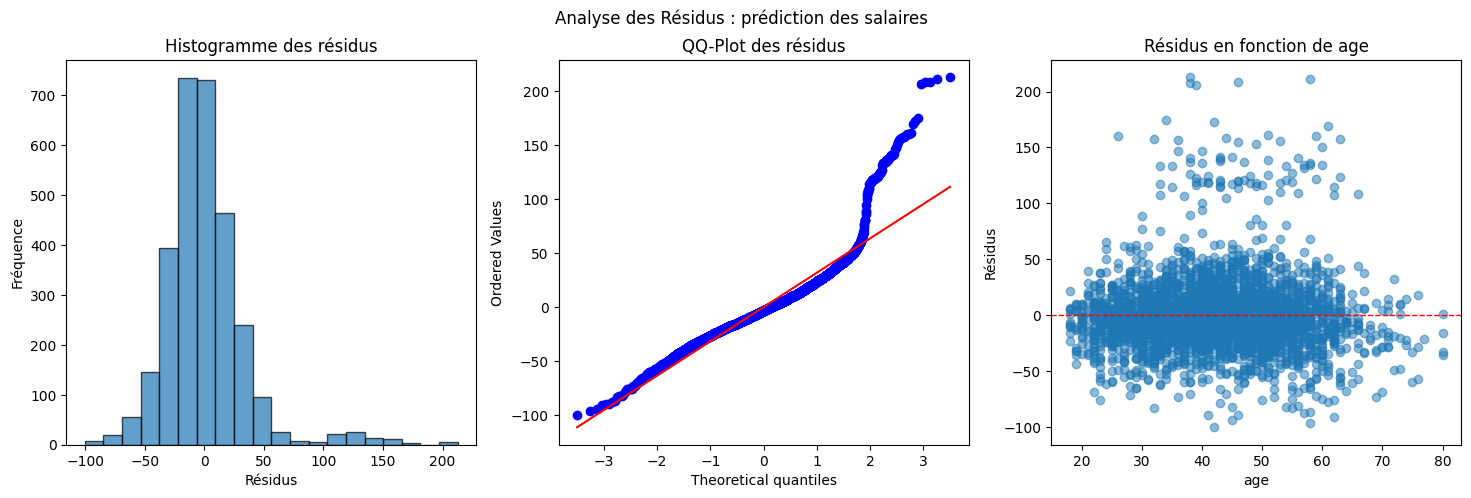

In [44]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats as stats

# Fonction pour tracer les grahiques de résidus
def plot_residuals(X, Y, Y_pred,feature_name, title):
    residuals = Y - Y_pred

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # Histogramme des résidus
    axes[0].hist(residuals, bins=20, edgecolor='black', alpha=0.7)
    axes[0].set_title('Histogramme des résidus')
    axes[0].set_xlabel('Résidus')
    axes[0].set_ylabel('Fréquence')

    # QQ-Plot des résidus
    stats.probplot(residuals, dist="norm", plot=axes[1])
    axes[1].set_title('QQ-Plot des résidus')

    # Graphique des résidus en fonction de Advanced_Degree
    if feature_name in X.columns:
        feature_values = X[feature_name]
    else:
        raise ValueError(f"Feature '{feature_name}' n'existe pas dans X")
    
    axes[2].scatter(feature_values, residuals, alpha=0.5)
    axes[2].axhline(0, color='red', linestyle='dashed', linewidth=1)
    axes[2].set_title(f'Résidus en fonction de {feature_name}')
    axes[2].set_xlabel(feature_name)
    axes[2].set_ylabel('Résidus')

    plt.suptitle(title)
    plt.show()

# Appel de la fonction avec Advanced_Degree comme varaible explicative
plot_residuals(X, Y, Y_pred_sklearn, "age", "Analyse des Résidus : prédiction des salaires")   

*4.(a)* Histogramme des résidus: les résidus sont plus répartis de façon symétrique autour de 0 indiquant uen amélioration dans la normalité des erreurs.
        QQ-Plot des résidus :  Les points suivent davantage la droite de référence, ce qui montre une meilleure adéquation des résidus à une loi normale. Cependant, il subsiste de légers écarts dans les extrémités suggérant que la normalité n'est pas complètement atteinte
        Résidus en fonction de age : Les résidus apparaissent répartis aléatoirement autour de zéro, sans motif particulier. Le modèle est plus homogène.

*4.(b)* Etant donné que R² est monté à quasiment 34% et que les grahpiques montrent uen distribution plus homogène , le modèle est plus informatif.

*4.(c)* EN pistes d'amélioration, on pourrait essayer d'autres types de modèles afin de capturer des relations plus complexe. Utiliser des variables explicatives supplémentaires. Transformer les données aberrantes afin d'augmenter l'ajustement global.